# 1. Chapter : 좌표계(Coordinate Reference Systems)

## 1-1. Setting the CRS

In [8]:
import geopandas as gpd
import pandas as pd

In [6]:
# 지오데이터프레임 불러오기
regions = gpd.read_file("../../01_data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

# 좌표계를 확인할려면 shp파일의 데이터프레임명.crs 를 통해서 확인할 수 있다.
print(regions.crs)

EPSG:32630


**EPSG란?** \
`EPSG:32630`에서 `EPSG`는 `European Petroleum Survey Group`의 약자로, 원래는 석유 탐사 분야에서 공간 좌표계 표준화를 위해 만들어진 `조직(Group)`이다.\
이후 해당 조직은 국제적인 좌표계 코드 체계를 관리하면서 공간정보 분야에서 널리 사용되고, 현재는 `국제 좌표계 데이터베이스의 코드 체계`로 알려져있다.

**EPSG코드 정리표**
| EPSG 코드 | 설명 | 좌표계 유형 |
|-----------|------------------------------|-------------|
| **4326**  | WGS 84 – 위도/경도 (GPS에서 사용) | 지리 좌표계 |
| **5181**  | Korea 2000 / Central Belt (TM 중부원점) | 투영 좌표계 |
| **5186**  | Korea 2000 / West Belt (TM 서부원점) | 투영 좌표계 |
| **5187**  | Korea 2000 / East Belt (TM 동부원점) | 투영 좌표계 |
| **5174**  | Korea 2000 / Unified CS (통합좌표계, 일부 공공기관 사용) | 투영 좌표계 |
| **5179**  | Korea 2000 / TM 중부 (6도대, 국토부 표준) | 투영 좌표계 |
| **32652** | UTM Zone 52N (경상북도, 강원도 일부 등) | 투영 좌표계 |
| **32651** | UTM Zone 51N (서울, 경기, 충청, 전라도 등) | 투영 좌표계 |


In [22]:
facilities_df

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098
...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,NaN,NaN
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,NaN,NaN
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,NaN,NaN
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,NaN,NaN


In [21]:
# 가나의 건강 센터 데이터를 데이터프레임으로 불러오기
facilities_df = pd.read_csv("../../01_data/ghana/ghana/health_facilities.csv")

# 데이터프레임을 지오데이터프레임 형태로 변환
facilities = gpd.GeoDataFrame(facilities_df,
                              geometry=gpd.points_from_xy(facilities_df.Longitude,
                                                          facilities_df.Latitude))
# 불러온 데이터의 좌표계 타입 확인해보기
print(f"csv파일에서 gpd 변환 후 좌표계 읽었을 때 : {facilities.crs}")

# 좌표계 설정 후
# facilities.crs = {'init':'epsg:4326'} # 예전 방식
facilities.set_crs(epsg=4326, inplace=True)

print(f"좌표계 변환 후 : {facilities.crs}")

csv파일에서 gpd 변환 후 좌표계 읽었을 때 : None
좌표계 변환 : epsg:4326
좌표계 변환 후 : EPSG:4326


위 과정을 통해서 csv파일을 geodataframe으로 변경하기 위해 pandas, geopandas 모두 사용해야 된다는 것을 알게 되었다.
- 1) dataframe 형태로 변환
- 2) geodataframe 형태로 변환
- 3) gpd.points_from_xy()를 통해 경도와 위도순서대로 로드

## 1-2. 재투영
좌표계를 새로운 좌표계로 재투영하는 작업, `to_crs()`를 통해 재투영을 진행

<Axes: >

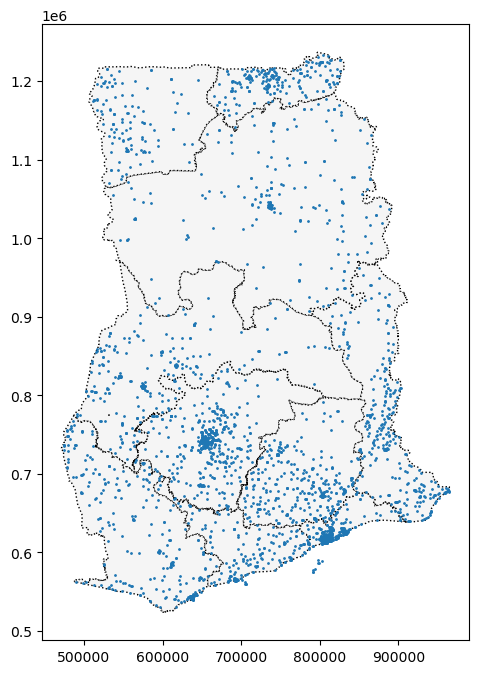

In [24]:
# 이전 좌표계로 맵 시각화
ax = regions.plot(figsize=(8, 8), color='whitesmoke', linestyle=':', edgecolor="black")
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [32]:
# 좌표계 변환 전 latitude, longitude
print(f"좌표계 변환 전 : {facilities.crs}")

# 좌표계 변환 후 latitude, longitude
print(f"좌표계 변환 후 : {facilities.to_crs(epsg=32630).crs}")

facilities.to_crs(epsg=32630).head(2)

좌표계 변환 전 : EPSG:4326
좌표계 변환 후 : EPSG:32630


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)


geopandas에서 EPSG코드가 적용되지 않는 경우, `proj4 string`을 통해서 위도와 경도를 변경할 수 있다.

In [33]:
# epsg4326으로 변경
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.2942, -..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


## 1-3. 실전 연습

In [37]:
# 각 포인트의 x, y좌표 확인하기
# facilities.geometry.head().x
facilities.geometry.head().y

0    7.40801
1    6.46312
2    6.22393
3    6.84177
4    6.84177
dtype: float64

In [49]:
# 라인의 길이 확인
# AREA 컬럼을 새롭게 만들어서 면적 넣어주기
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print(f"가나의 면적 : {regions.area.sum() / 10**6}")
print(f"좌표계 : {regions.crs}")
regions.head()

가나의 면적 : 239584.57600556687
좌표계 : EPSG:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


# 2. Exercise
조류 이동 방향을 확인하여 퍼플마틴이 방문을 자주 하는 곳을 파악하기

In [50]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

## 2-1. 데이터 불러오기

In [56]:
# pandas의 parse_dates는 날짜/시간 데이터를 자동으로 datetime 타입으로 변환
birds_df = pd.read_csv("../../01_data/purple_martin.csv", parse_dates=['timestamp'])

# 오랜만에 사용해보는 포멧 문자열
print("총 {}개의 서로 다른 새가 데이터셋에 존재함".format(birds_df['tag-local-identifier'].nunique()))
print(f"11개의 새 종류 : {birds_df['tag-local-identifier'].unique()}")
birds_df.head(2)

총 11개의 서로 다른 새가 데이터셋에 존재함
11개의 새 종류 : [30448 30445 30384 30380 30304 30198 30048 30300 30054 30275 30263]


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448


### 1) 데이터셋 EDA

In [58]:
# 데이터셋 확인해보기 
birds_df[birds_df['tag-local-identifier'] == 30448]

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448
5,2014-12-15 15:00:00,-61.648530,-11.372407,30448
6,2014-12-30 19:59:00,-61.825113,-10.459245,30448
7,2015-01-15 00:59:00,-58.779585,-3.874240,30448
8,2015-01-30 05:59:00,-59.214892,-3.327592,30448
9,2015-02-14 10:59:00,-59.500591,-3.918050,30448


데이터셋을 확인 결과
- 새의 종류에 따라서 어떻게 이동했는지 위치과 시간이 기록되어 있다.
- 총 11종류의 새 데이터가 존재

이제 GeoDataFrame으로 변경하여 위치 시각화 진행

## 2-2. 데이터 변환

### 1) GeoDataFrame 으로 변환

In [77]:
# gpd 선언
birds = gpd.GeoDataFrame(birds_df,
                         geometry = gpd.points_from_xy(birds_df['location-long'],
                                                       birds_df['location-lat']))

# 좌표계 저장
birds.set_crs(epsg=4326, inplace=True)

print(f"변경된 좌표계 확인 : {birds.crs}")
birds.head(2)

변경된 좌표계 확인 : EPSG:4326


,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.2435 13.09578)


## 2-3. 지도 시각화

In [91]:
# 국가별 경계 데이터를 불러오기
world = gpd.read_file("../../01_data/110m_cultural/ne_110m_admin_0_countries.shp")

# 아메리카 지역만 사용
americas = world.loc[world['CONTINENT'].isin(['North America', 'South America'])]
americas.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5..."
10,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<Axes: >

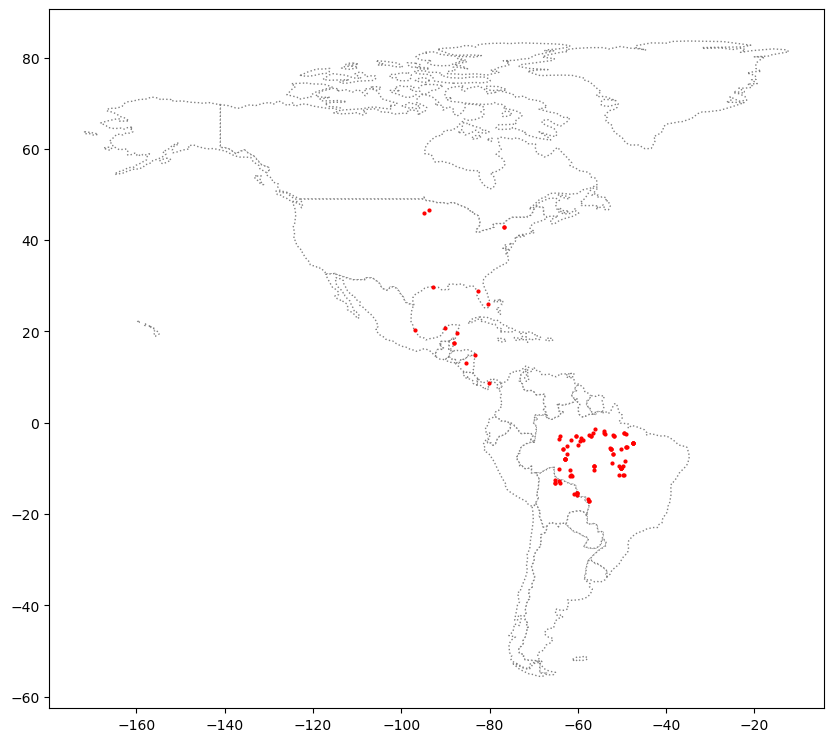

In [95]:
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')
birds.plot(markersize=4, color='red', ax=ax)

# 줌하는 방법
# ax.set_xlim([-110, -30])
# ax.set_ylim([-30, 60])

## 2-4. 새들의 이동 경로 파악

In [107]:
# 새들의 이동 경로를 라인스트링 형태로 저장 
path_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()

# 새들의 이동 경로를 gpd 형태로 변환
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)

# 좌표계 정의
path_gdf.set_crs(epsg=4326, inplace=True)

# 새들의 이동 시작점 정의
start_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: x[0]).reset_index()

# 새들의 이동 시작점을 gpd 형태로 변환
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)

# 좌표계 정의
start_gdf.set_crs(epsg=4326, inplace=True)

print("새들의 이동 경로")
display(path_gdf.head(2))
print("새들의 이동 시작점")
display(start_gdf.head(2))

새들의 이동 경로


,tag-local-identifier,geometry
0,30048,"LINESTRING (-90.12992 20.73242, -56.29394 -10...."
1,30054,"LINESTRING (-93.60861 46.50563, -63.28897 -5.7..."


새들의 이동 시작점


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)


In [119]:
# 새들의 이동 종료점 정의
end_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()

# 새들의 이동 종료점을 gpd 형태로 변환
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)

# 좌표계 정의
end_gdf.set_crs(epsg=4326, inplace=True)

end_gdf.head(2)

,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.0384)


## 2-5. 새들의 이동경로 시각화
위에서 만든 `path_gdf`, `start_gdf`, `end_gdf` 를 기반으로 새들의 이동경로를 시각화

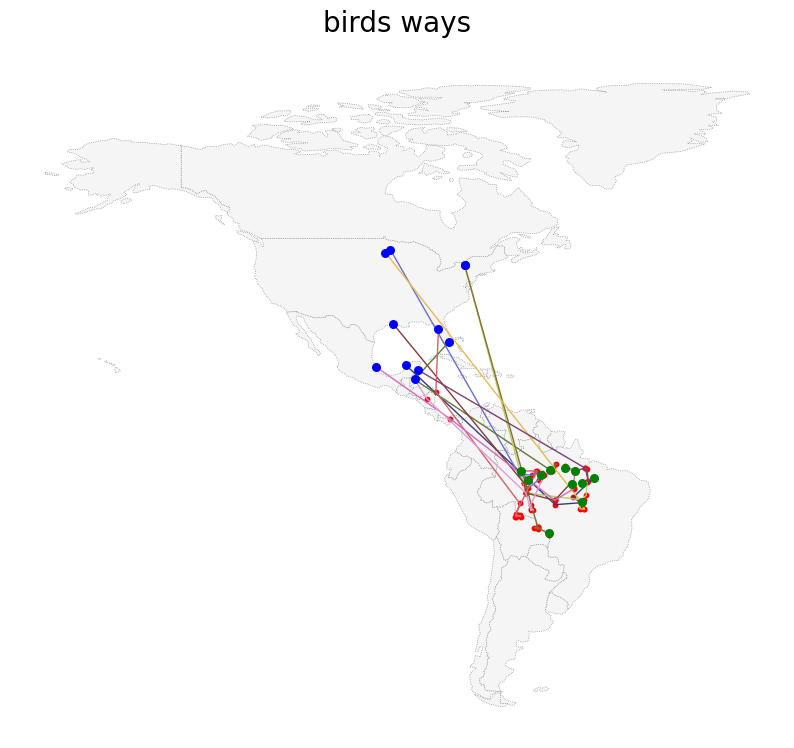

In [124]:
# north, south america 배경 만들기
ax = americas.plot(figsize=(10, 10), color='whitesmoke', linewidth=0.5, linestyle=':', edgecolor='gray')

# 조류 위치 시각화
birds.plot(markersize=10, color='red', ax=ax)
# 조류 경로 (라인)시각화
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
start_gdf.plot(ax=ax, color='blue', markersize=30)
end_gdf.plot(ax=ax, color='green', markersize=30)

# 제목 및 기타 요소 추가
ax.set_title("birds ways", fontsize=20, pad=15)
ax.set_axis_off()

## 2-6. 조류 보호 구역

### 1) 남아메리카 보호 구역

In [129]:
# 보호구역 데이터 불러오기
protected_areas = gpd.read_file("../../01_data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")

<Axes: >

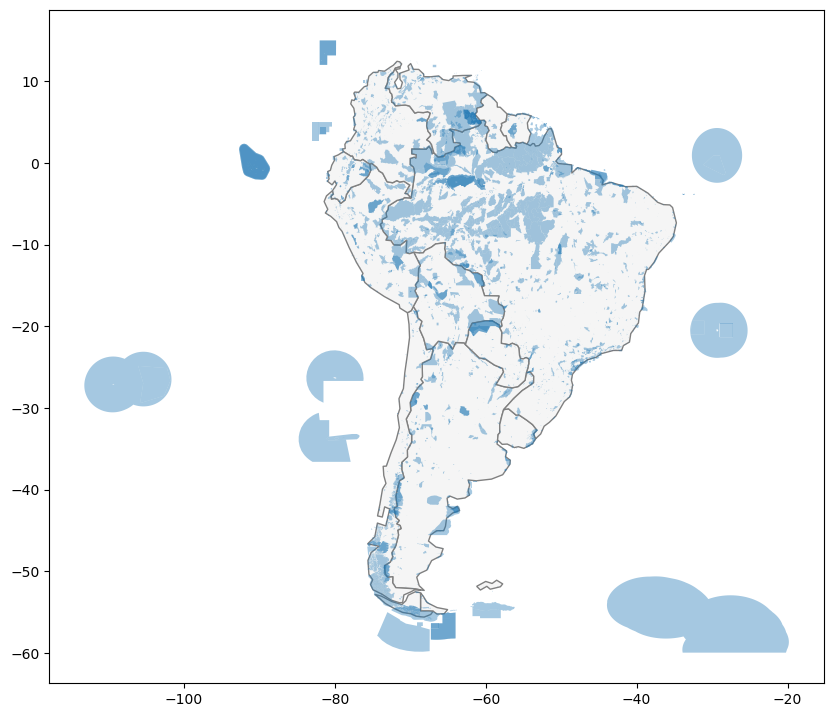

In [130]:
# 남아메리카 경계만 저장하기
south_america = americas.loc[americas['CONTINENT'] == 'South America']

# 남아메리카 보호구역 & 경계 시각화
ax = south_america.plot(figsize=(10, 10), color='whitesmoke', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4)

### 2) 남아메리카는 몇%의 보호구역이 차지하고 있는지?
남미 지역에 몇 퍼센트가 보호받고 있는지 파악하기 위해 아래와 같은 작업이 요구
- 1) 남미의 모든 보호 지역(해양면적 제외)의 총 면적을 계산
- 2) `REP_AREA`, `REP_M_AREA` 컬럼을 사용하여 총 대지면적, 총 해양면적을 파악

In [142]:
# 보호구역의 면적 총합 확인
sum_area = sum(protected_areas['REP_AREA'])
print(f"남미의 총 보호 면적 : {sum_area:.4f}")
sum_m_area = sum(protected_areas['REP_M_AREA'])
print(f"남미 해양 보호 면적 : {sum_m_area:.4f}")
print("---------------------")
print(f"남미의 육지 보호 면적 : {sum_area - sum_m_area:.4f}")

남미의 총 보호 면적 : 8424666.1156
남미 해양 보호 면적 : 3027904.2039
---------------------
남미의 육지 보호 면적 : 5396761.9117


In [141]:
# 남미의 해양 보호면적을 제외한 육지 보호면적 확인
p_area = sum(protected_areas['REP_AREA'] - protected_areas['REP_M_AREA'])
print(f"남미는 총 {p_area:.4f} km2 면적만큼의 육지 보호 면적이 존재")

남미는 총 5396761.9117 km2 면적만큼의 육지 보호 면적이 존재


In [161]:
# 남미의 전체 면적 확인
total_area = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6

# 남미에서 보호구역이 차지하는 면적 확인
percentage_protected = p_area / total_area
print(f"남미에서 보호구역이 차지하는 면적의 비율 : {round(percentage_protected *100, 2)}%")

남미에서 보호구역이 차지하는 면적의 비율 : 30.39%


### 3) 남미의 보호구역에 새들이 존재하는지 확인
남미의 보호구역에 새들의 이동구역에 포함되는지 확인 이동구역에 포함되는지 확인
- 육지 보호구역 데이터만 비교
    - `protected_areas[protected_areas['MARINE']!='2']` 해상구역은 제외


Text(0.5, 1.0, "birds in South America's protected area")

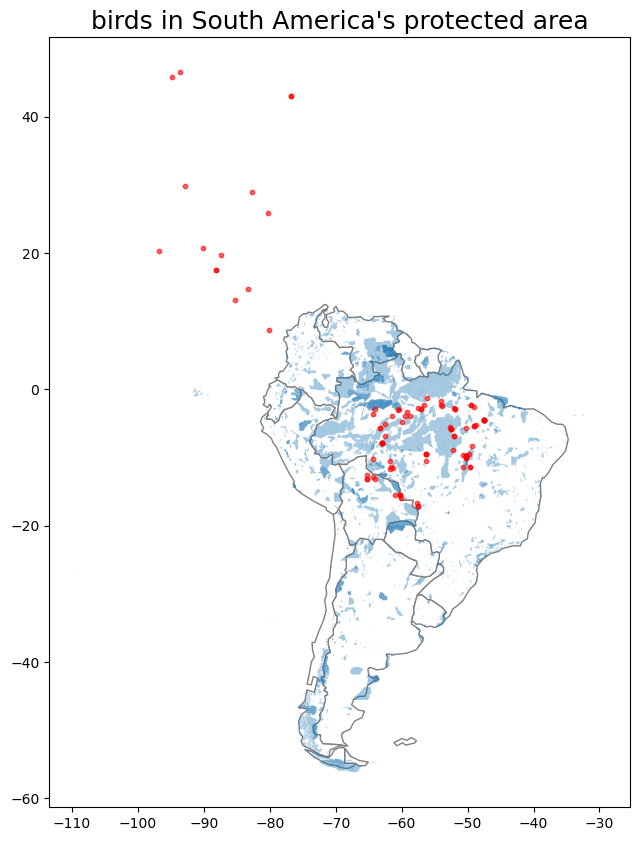

In [168]:
# 배경 시각화
ax = south_america.plot(figsize=(10, 10), color='white', edgecolor='gray')
protected_area[protected_area['MARINE'] != '2'].plot(ax=ax, alpha=0.4, zorder=1)
birds.plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)

# 제목 및 기타사항
ax.set_title("birds in South America's protected area", fontsize=18)